# Multiple Linear Regression 

### Importing Liberaries

In [3]:
# load CSV file and library for numerical functions
import pandas as pd
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Data loading

In [5]:
bike_data=pd.read_csv(r'C:\Users\singh\Downloads\day.csv')
# renaming columns or columns cleaning 
bike_data.columns= bike_data.columns.str.lower().str.replace(" ","_")
bike_data.rename(columns={
    "instant":"record_index",
    "dteday":"date",
    "yr":"year",
    "mnth":"month",
    "weathersit":"weather_situation",
    "hum":"humidity",
    "cnt":"total_rental"
},inplace=True)


In [6]:
bike_data.head()

,record_index,date,season,year,month,holiday,weekday,workingday,weather_situation,temp,atemp,humidity,windspeed,casual,registered,total_rental
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
bike_data.shape

(730, 16)

In [8]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   record_index       730 non-null    int64  
 1   date               730 non-null    object 
 2   season             730 non-null    int64  
 3   year               730 non-null    int64  
 4   month              730 non-null    int64  
 5   holiday            730 non-null    int64  
 6   weekday            730 non-null    int64  
 7   workingday         730 non-null    int64  
 8   weather_situation  730 non-null    int64  
 9   temp               730 non-null    float64
 10  atemp              730 non-null    float64
 11  humidity           730 non-null    float64
 12  windspeed          730 non-null    float64
 13  casual             730 non-null    int64  
 14  registered         730 non-null    int64  
 15  total_rental       730 non-null    int64  
dtypes: float64(4), int64(11), 

In [9]:
# All the columns are consitute non-null values, no further deals with missing values.

### Missing value

In [11]:
bike_data.isnull().sum()

record_index         0
date                 0
season               0
year                 0
month                0
holiday              0
weekday              0
workingday           0
weather_situation    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
total_rental         0
dtype: int64

In [12]:
# There is no missing value if it would be any missing value then we impute by the EDA

## EDA

In [14]:
bike_data.nunique()

record_index         730
date                 730
season                 4
year                   2
month                 12
holiday                2
weekday                7
workingday             2
weather_situation      3
temp                 498
atemp                689
humidity             594
windspeed            649
casual               605
registered           678
total_rental         695
dtype: int64

### Data Prepration

In [16]:
num_col = ["record_index", "date","temp","atemp", "humidity" ,"windspeed" ,"casual" ,"registered", "total_rental"]
cat_col = ["season", "year" ,"month", "holiday", "weekday", "workingday", "weather_situation"]  

In [17]:
# Understanding the data and visualisation of data


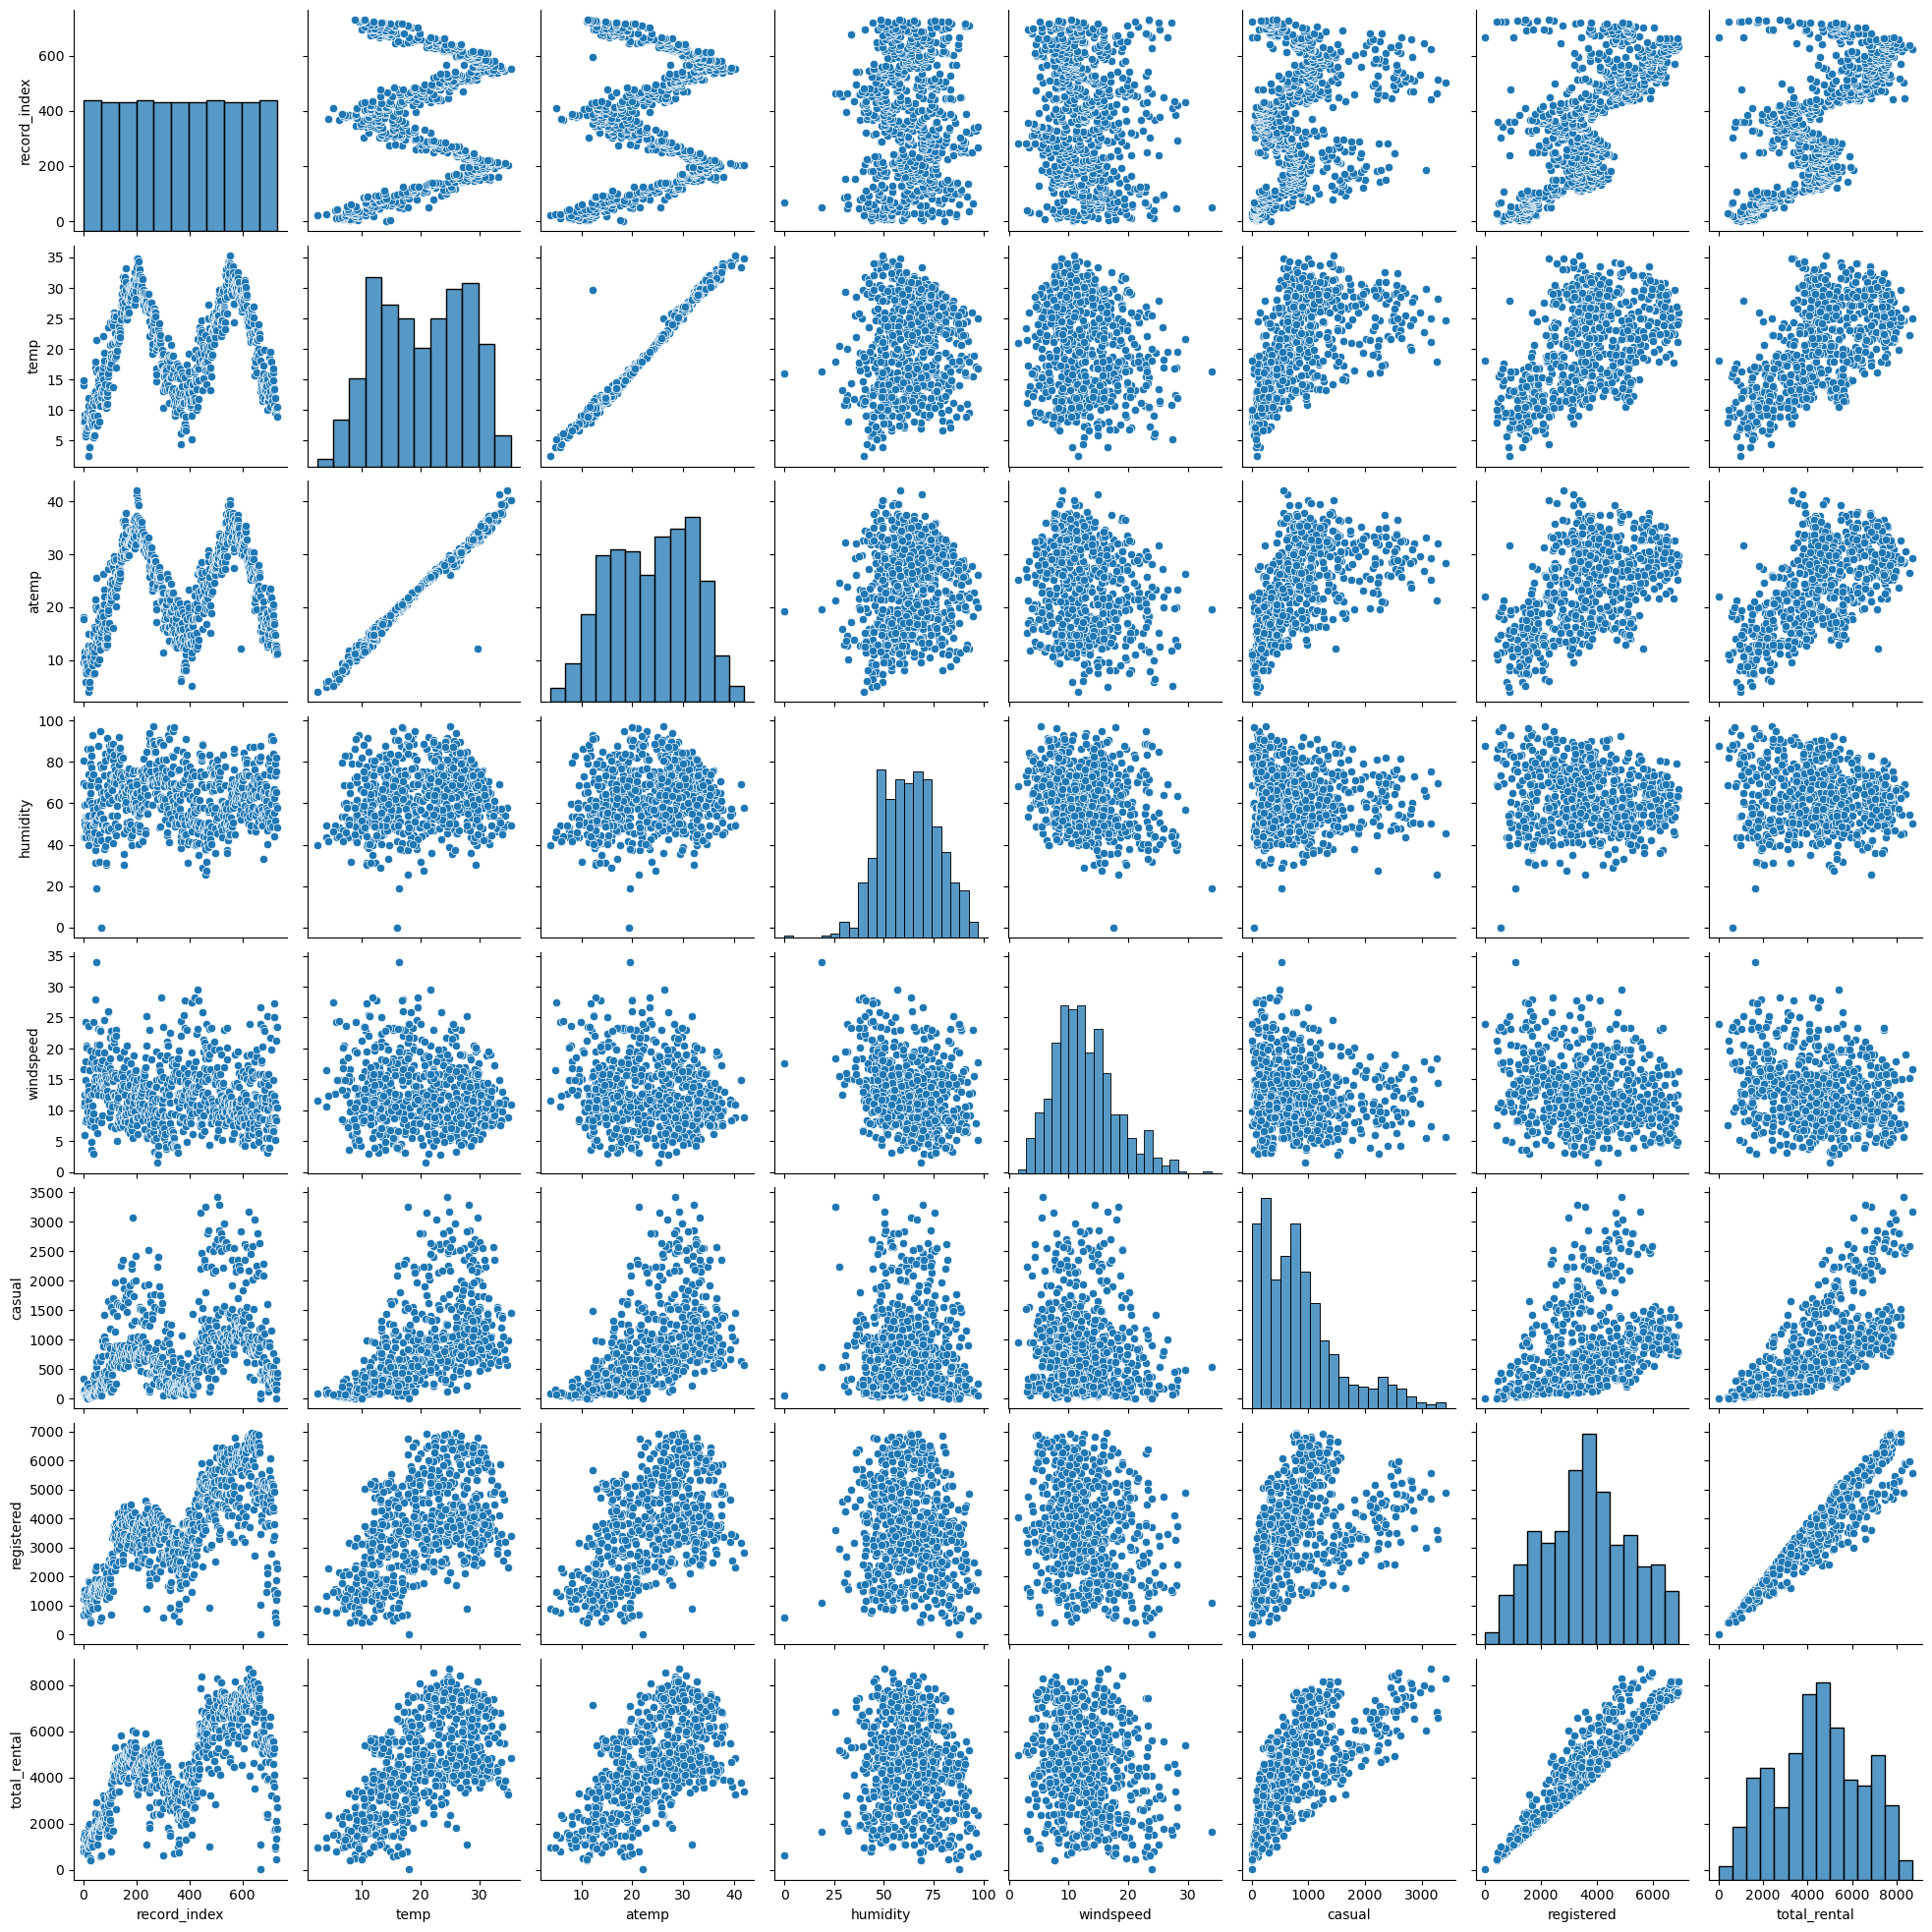

In [18]:
sns.pairplot(bike_data[num_col])
plt.show()

## Univariate Analysis

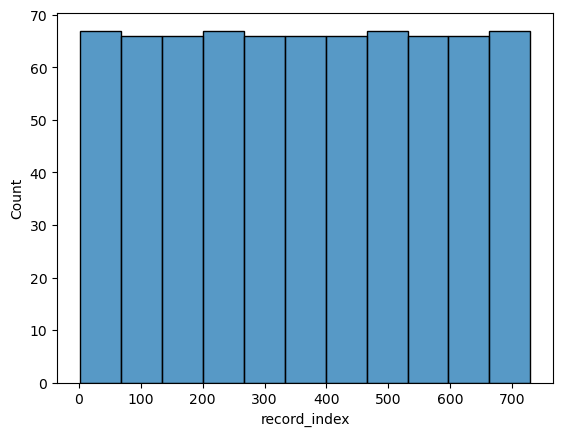

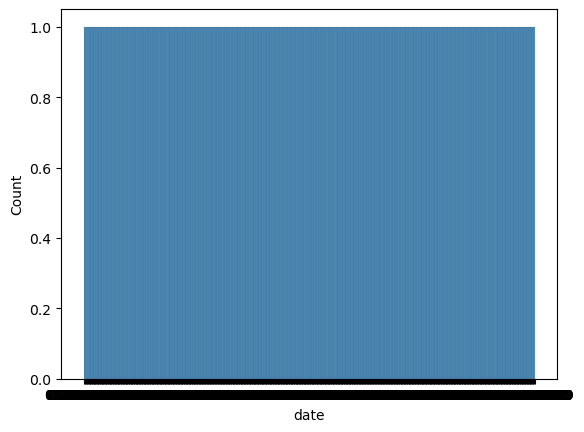

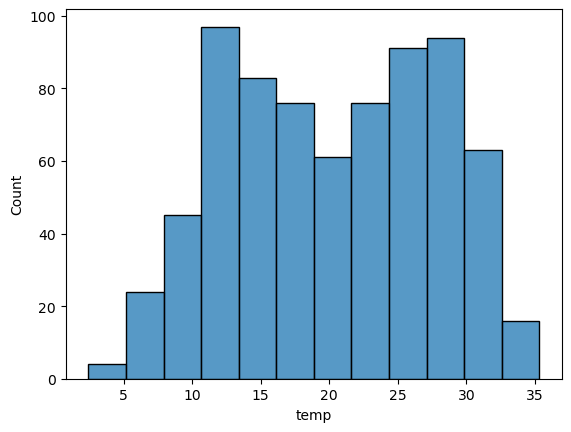

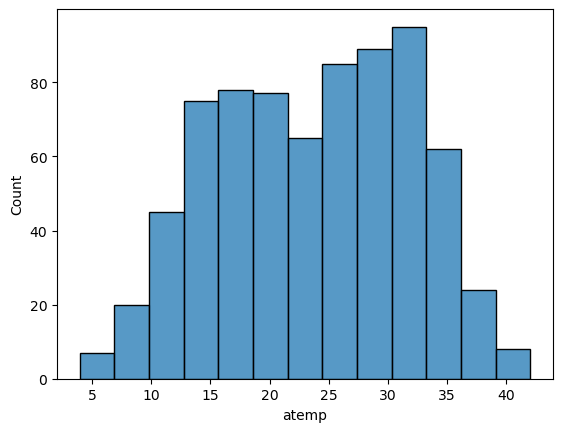

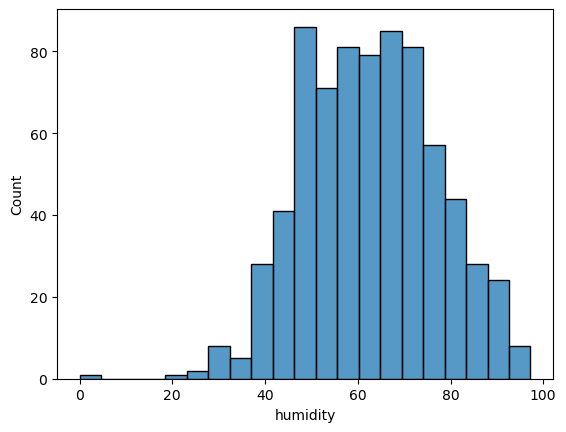

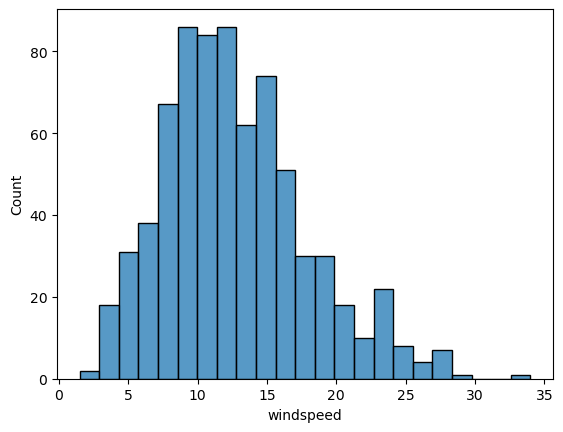

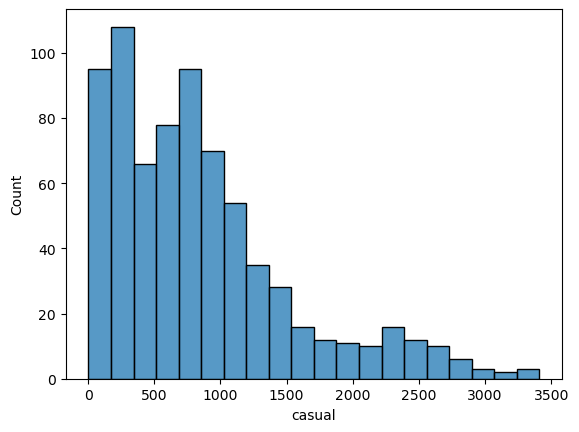

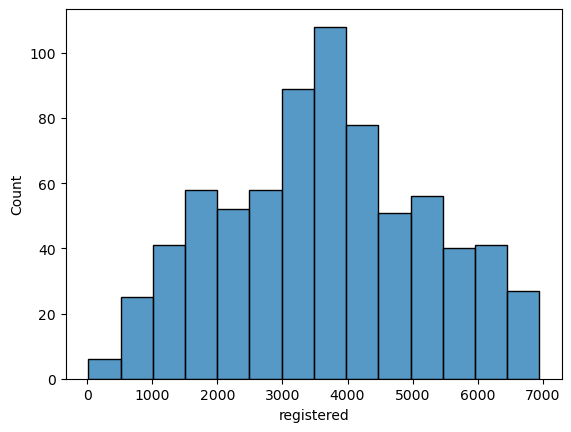

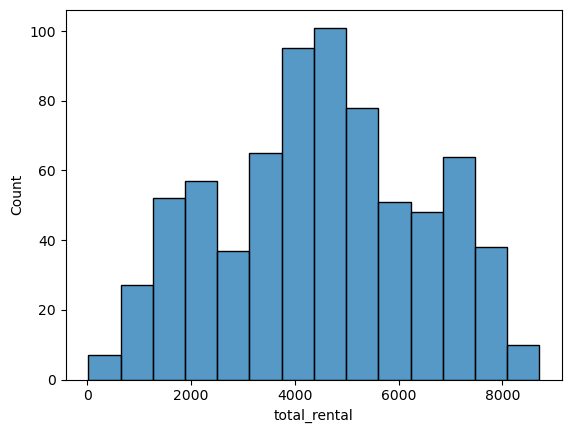

In [20]:
for i in num_col:
    sns.histplot(x=bike_data[i])
    plt.show()

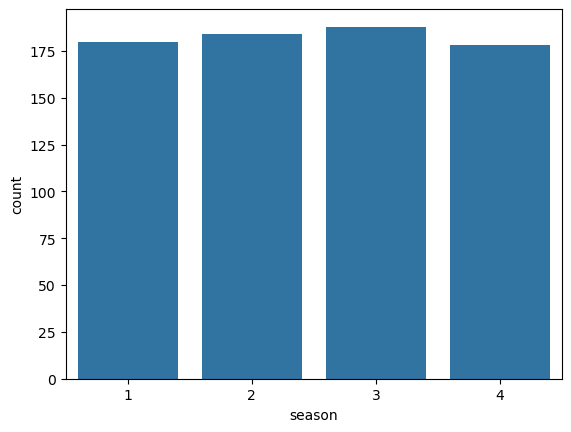

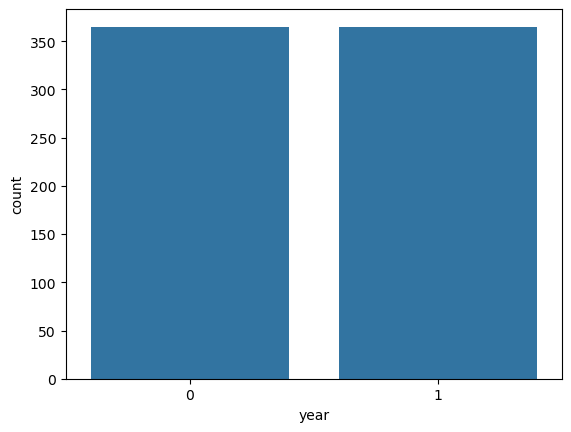

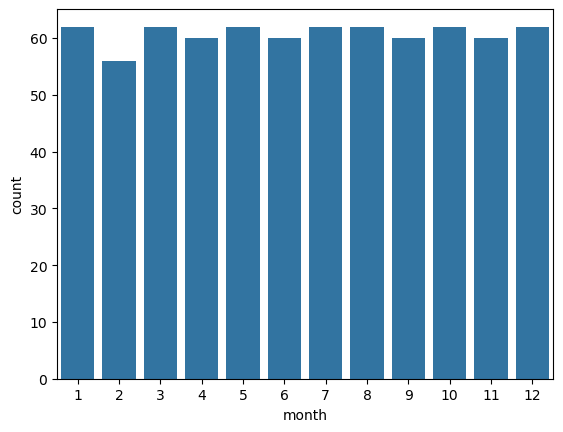

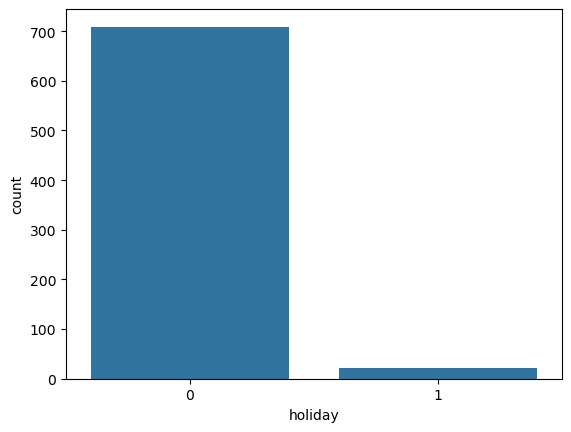

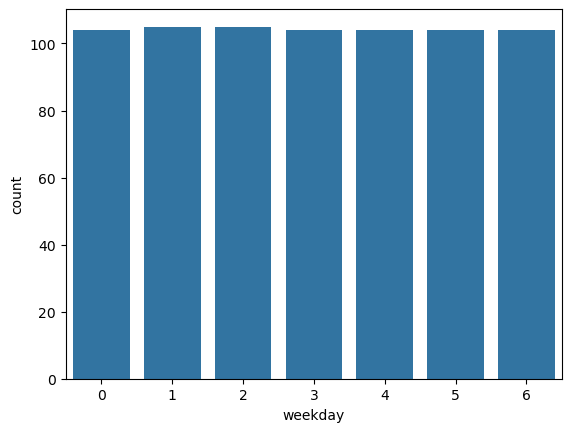

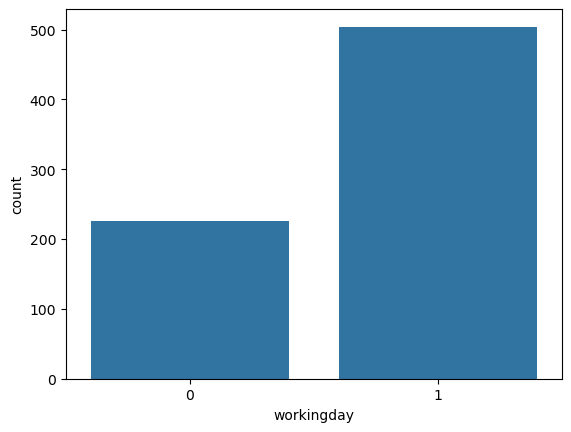

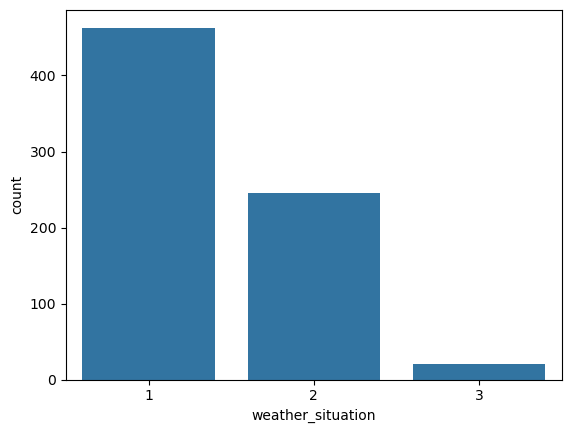

In [21]:
for i in cat_col:
    sns.countplot(x=bike_data[i])
    plt.show()

## Bivariate Analysis

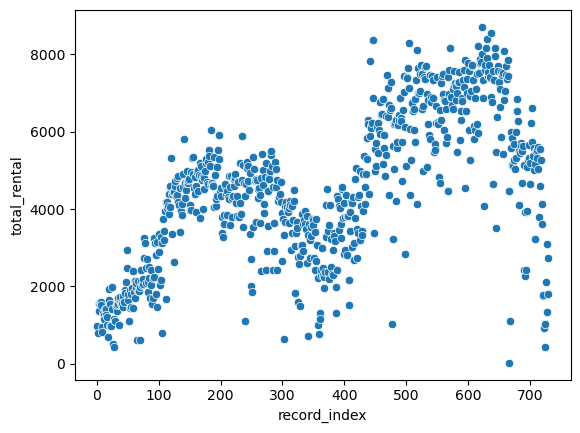

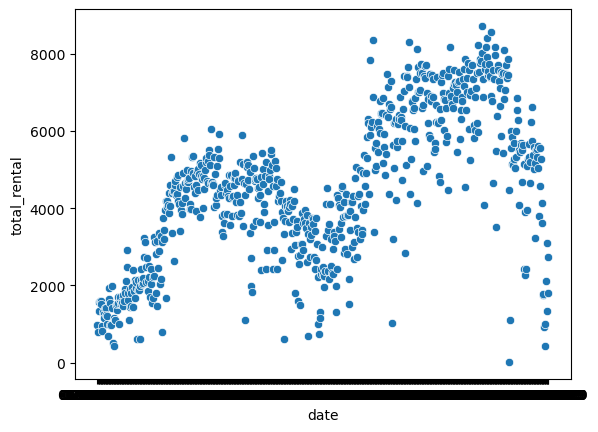

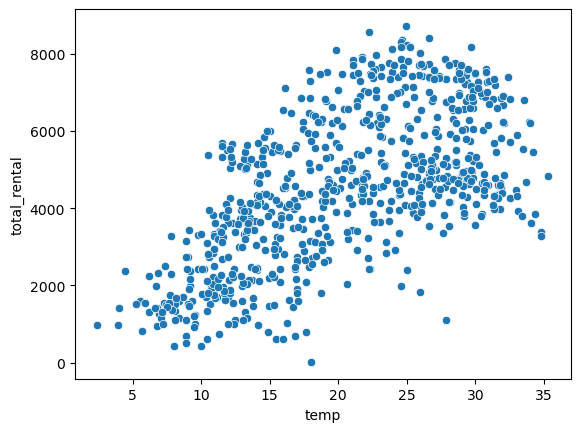

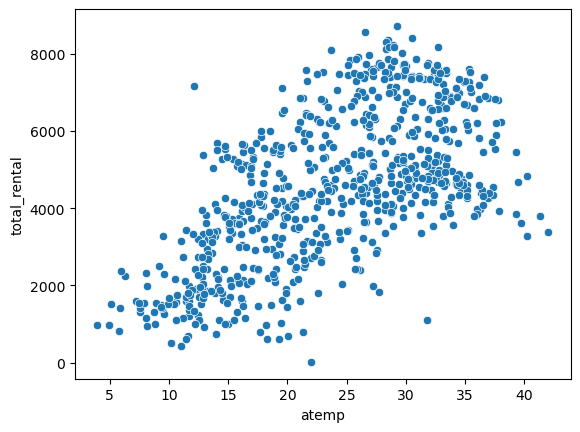

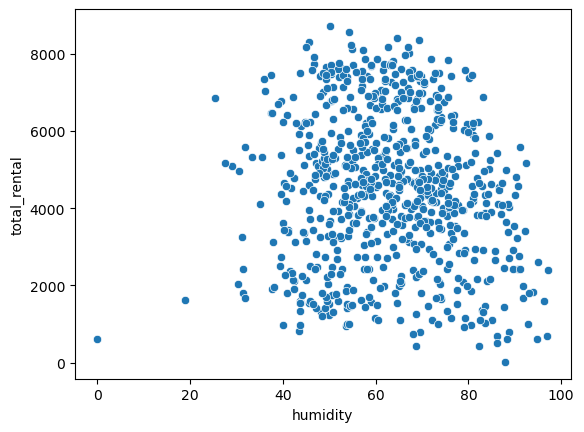

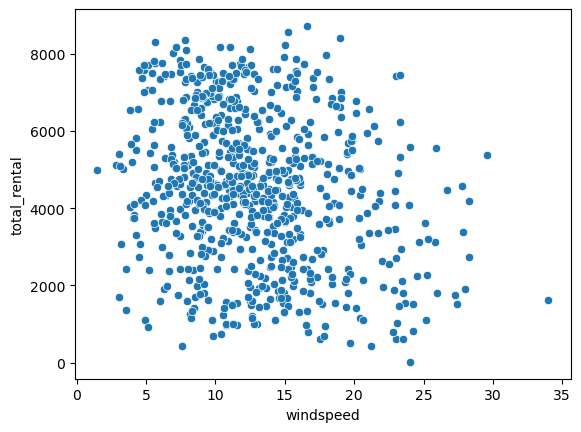

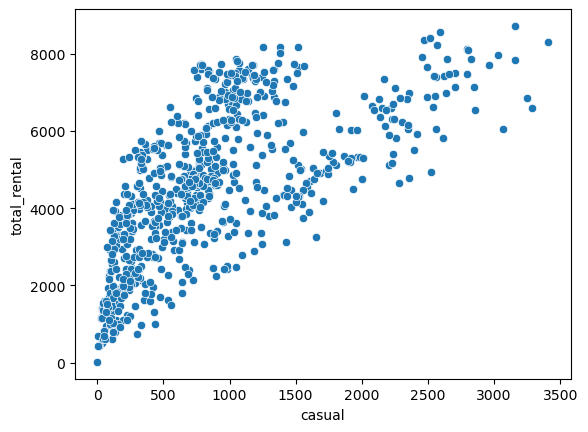

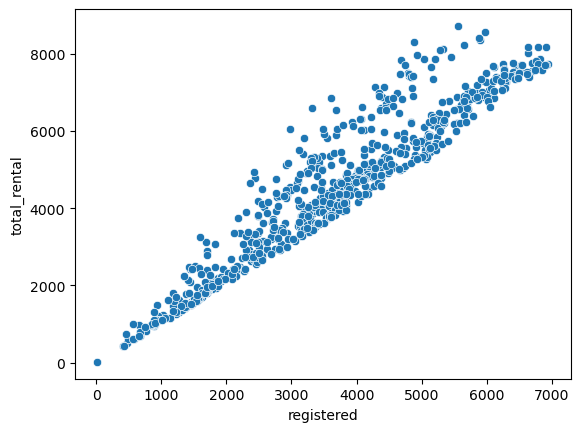

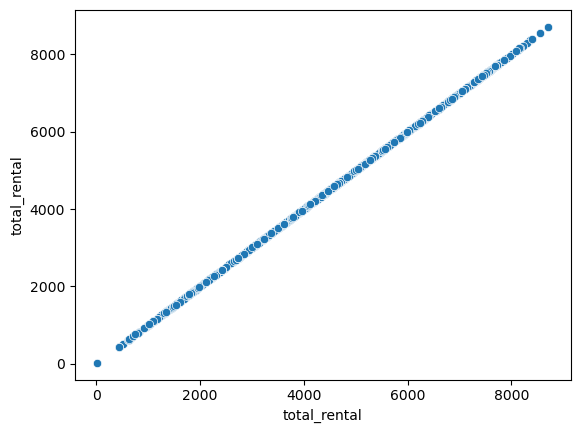

In [23]:
for i in num_col:
    sns.scatterplot(x=bike_data[i],y=bike_data["total_rental"])
    plt.show()

In [24]:
bike_data.drop(columns=['date'],axis=1,inplace=True)

In [25]:
bike_data.head()

,record_index,season,year,month,holiday,weekday,workingday,weather_situation,temp,atemp,humidity,windspeed,casual,registered,total_rental
0,1,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Mutivariate Analysis

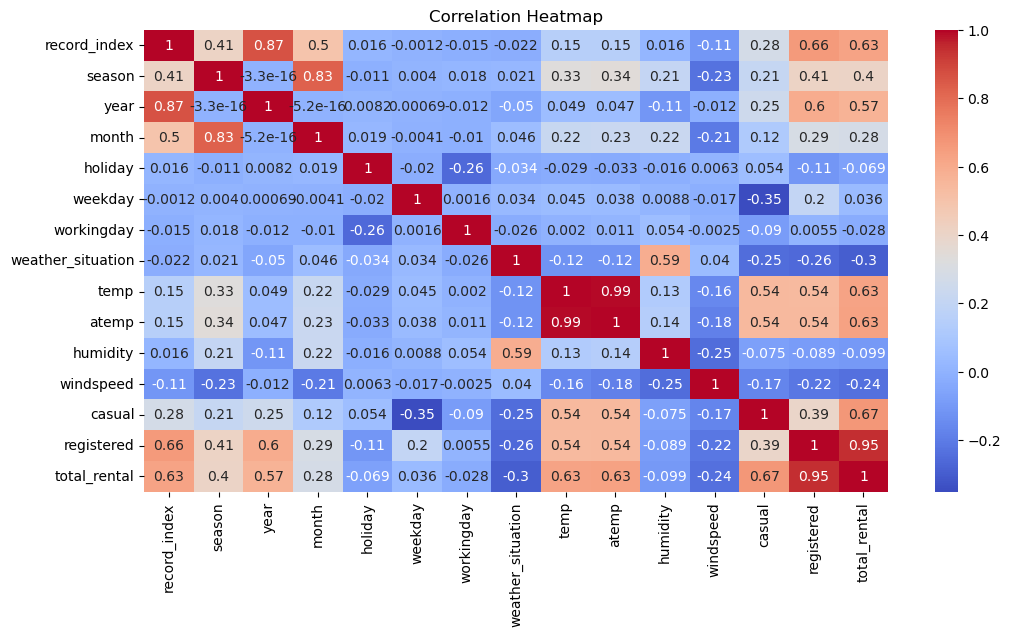

In [27]:
plt.figure(figsize=(12,6))
sns.heatmap(bike_data.corr(),annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Pre-Processing step

### Dummy variable

In [30]:
bike_data1=pd.get_dummies(bike_data,columns=['season','weather_situation','month','weekday'],drop_first=True,dtype=int)

In [31]:
bike_data1.head()

,record_index,year,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,...,month_9,month_10,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,1,0,0,1,14.110847,18.18125,80.5833,10.749882,331,654,...,0,0,0,0,1,0,0,0,0,0
1,2,0,0,1,14.902598,17.68695,69.6087,16.652113,131,670,...,0,0,0,0,0,1,0,0,0,0
2,3,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,...,0,0,0,0,0,0,1,0,0,0
3,4,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,...,0,0,0,0,0,0,0,1,0,0
4,5,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,...,0,0,0,0,0,0,0,0,1,0


In [32]:
bike_data1.shape

(730, 33)

In [33]:
bike_data1.columns

Index(['record_index', 'year', 'holiday', 'workingday', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'total_rental',
       'season_2', 'season_3', 'season_4', 'weather_situation_2',
       'weather_situation_3', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6'],
      dtype='object')

# Train_test_split

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X=bike_data1.drop(["total_rental"],axis=1)
y=bike_data1["total_rental"]

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100) #train_test(80:20) we choose

In [38]:
X_train.head()

,record_index,year,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,...,month_9,month_10,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
367,368,1,0,1,6.150000,6.31375,44.1250,24.499957,89,2147,...,0,0,0,0,0,0,0,1,0,0
648,649,1,0,1,17.835000,21.55835,46.3333,12.166932,834,6736,...,0,1,0,0,0,0,0,0,1,0
44,45,0,0,1,17.015000,19.91750,37.5833,27.999836,208,1705,...,0,0,0,0,0,0,1,0,0,0
705,706,1,0,0,13.154153,16.09790,76.4167,8.750200,349,4659,...,0,0,0,1,0,0,0,0,0,1
379,380,1,0,1,6.833347,8.08125,41.9167,16.834286,284,2027,...,0,0,0,0,0,1,0,0,0,0


In [39]:
print(X_train.shape)
print(X_test.shape)

(584, 32)
(146, 32)


# Scaling

In [41]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test) # test data set is unseen, we can't fit on it

In [42]:
X_train_df = pd.DataFrame(X_train,columns=X.columns)
X_test_df = pd.DataFrame(X_test,columns=X.columns)

In [43]:
X_train_df.head()

,record_index,year,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,...,month_9,month_10,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,-0.014092,0.972968,-0.167836,0.614295,-1.884077,-2.133573,-1.351866,2.236778,-1.124647,-0.948143,...,-0.295843,-0.319197,-0.295843,-0.309330,-0.429633,-0.435212,-0.39841,2.422930,-0.424026,-0.369035
1,1.316517,0.972968,-0.167836,0.614295,-0.306750,-0.241154,-1.193941,-0.119144,-0.019173,1.930767,...,-0.295843,3.132860,-0.295843,-0.309330,-0.429633,-0.435212,-0.39841,-0.412723,2.358346,-0.369035
2,-1.543582,-1.027783,-0.167836,0.614295,-0.417439,-0.444845,-1.819690,2.905344,-0.948068,-1.225432,...,-0.295843,-0.319197,-0.295843,-0.309330,-0.429633,-0.435212,2.50998,-0.412723,-0.424026,-0.369035
3,1.586427,0.972968,-0.167836,-1.627882,-0.938605,-0.918998,0.957450,-0.771827,-0.738844,0.627761,...,-0.295843,-0.319197,-0.295843,3.232798,-0.429633,-0.435212,-0.39841,-0.412723,-0.424026,2.709771
4,0.042731,0.972968,-0.167836,0.614295,-1.791834,-1.914161,-1.509791,0.772439,-0.835294,-1.023425,...,-0.295843,-0.319197,-0.295843,-0.309330,-0.429633,2.297731,-0.39841,-0.412723,-0.424026,-0.369035


# Feature Seclection

In [45]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [46]:
estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=10) # we can select the feature between 8-20

In [47]:
selector=selector.fit(X_train,y_train)
selector.support_

array([ True,  True, False,  True,  True,  True, False, False,  True,
        True, False, False, False,  True,  True, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [48]:
selector_features=X_train_df.columns[selector.support_]
print(selector_features)

Index(['record_index', 'year', 'workingday', 'temp', 'atemp', 'casual',
       'registered', 'weather_situation_2', 'weather_situation_3', 'month_5'],
      dtype='object')


In [49]:
X_train=X_train_df[selector_features]
X_test=X_test_df[selector_features]

In [50]:
print(X_train.shape)
print(X_test.shape)

(584, 10)
(146, 10)


# Modeling

In [52]:
import statsmodels.api as sm

In [53]:
X_train_sm=sm.add_constant(X_train)
X_test_sm=sm.add_constant(X_test)

In [54]:
model1=sm.OLS(np.array(y_train),X_train_sm)
res1=model1.fit()

In [55]:
res1.params

const                  4.505267e+03
record_index           5.115908e-13
year                  -9.947598e-14
workingday             1.989520e-13
temp                  -9.094947e-13
atemp                  6.821210e-13
casual                 6.739195e+02
registered             1.594006e+03
weather_situation_2   -7.105427e-14
weather_situation_3   -8.526513e-14
month_5                3.694822e-13
dtype: float64

In [56]:
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.892e+31
Date:                Sun, 06 Apr 2025   Prob (F-statistic):               0.00
Time:                        17:47:18   Log-Likelihood:                 15009.
No. Observations:                 584   AIC:                        -3.000e+04
Df Residuals:                     573   BIC:                        -2.995e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4505.2671   6

In [57]:
X_train_sm=X_train_sm.drop("year",axis=1)
X_test_sm=X_test_sm.drop("year",axis=1)

In [58]:
model2=sm.OLS(np.array(y_train),X_train_sm)# Ordinary Least Squares
res2=model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.413e+32
Date:                Sun, 06 Apr 2025   Prob (F-statistic):               0.00
Time:                        17:47:18   Log-Likelihood:                 15148.
No. Observations:                 584   AIC:                        -3.028e+04
Df Residuals:                     574   BIC:                        -3.023e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4505.2671   5.49e-14   8.21e+16      0.000    4505.267    4505.267
record_index         2.558e-13   8.46e-14      3.024      0.003    8.97e-14    4.22e-13
workingday           4.547e-13   5.55e-14      8.197      0.000    3.46e-13    5.64e-13
temp                -4.547e-13   4.01e-13     -1.135      0.257   -1.24e-12    3.32e-13
atemp                4.547e-13   4.02e-13      1.130      0.259   -3.36e-13    1.25e-12
casual                673.9195   7.11e-14   9.47e+15      0.000     673.919     673.919
registered           1594.0058   1.01e-13   1.58e+16      0.000    1594.006    1594.006
weather_situation_2 -6.253e-13   5.81e-14    -10.756      0.000   -7.39e-13   -5.11e-13
weather_situation_3 -4.334e-13   6.06e-14     -7.158      0.000   -5.52e-13   -3.14e-13
month_5              6.821e-13   5.72e-14     11.916      0.000     5.7e-13    7.95e-13
==============================================================================
Omnibus:                       15.502   Durbin-Watson:                   1.515
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.900
Skew:                           0.343   Prob(JB):                     0.000214
Kurtosis:                       3.475   Cond. No.                         18.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
X_train_sm=X_train_sm.drop("atemp",axis=1)
X_test_sm=X_test_sm.drop("atemp",axis=1)

In [60]:
model3=sm.OLS(np.array(y_train),X_train_sm)
res3=model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.589e+32
Date:                Sun, 06 Apr 2025   Prob (F-statistic):               0.00
Time:                        17:47:18   Log-Likelihood:                 15147.
No. Observations:                 584   AIC:                        -3.028e+04
Df Residuals:                     575   BIC:                        -3.024e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4505.2671   5.49e-14   8.21e+16      0.000    4505.267    4505.267
record_index         2.274e-13   8.45e-14      2.692      0.007    6.15e-14    3.93e-13
workingday          -7.105e-14   5.53e-14     -1.285      0.199    -1.8e-13    3.76e-14
temp                 4.832e-13   8.22e-14      5.879      0.000    3.22e-13    6.45e-13
casual                673.9195   7.11e-14   9.48e+15      0.000     673.919     673.919
registered           1594.0058      1e-13   1.59e+16      0.000    1594.006    1594.006
weather_situation_2 -5.755e-13   5.81e-14     -9.909      0.000    -6.9e-13   -4.61e-13
weather_situation_3  6.395e-14   6.05e-14      1.056      0.291    -5.5e-14    1.83e-13
month_5              7.105e-13   5.72e-14     12.418      0.000    5.98e-13    8.23e-13
==============================================================================
Omnibus:                       35.295   Durbin-Watson:                   1.877
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.312
Skew:                          -0.601   Prob(JB):                     1.76e-09
Kurtosis:                       3.458   Cond. No.                         3.91
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
X_train_sm=X_train_sm.drop("weather_situation_3",axis=1)
X_test_sm=X_test_sm.drop("weather_situation_3",axis=1)

In [62]:
model4=sm.OLS(np.array(y_train),X_train_sm)# Ordinary Least Squares
res4=model4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.090e+32
Date:                Sun, 06 Apr 2025   Prob (F-statistic):               0.00
Time:                        17:47:18   Log-Likelihood:                 14998.
No. Observations:                 584   AIC:                        -2.998e+04
Df Residuals:                     576   BIC:                        -2.994e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4505.2671   7.09e-14   6.36e+16      0.000    4505.267    4505.267
record_index        -5.258e-13   1.04e-13     -5.047      0.000    -7.3e-13   -3.21e-13
workingday          -1.037e-12   7.14e-14    -14.528      0.000   -1.18e-12   -8.97e-13
temp                 9.095e-13   1.03e-13      8.852      0.000    7.08e-13    1.11e-12
casual                673.9195   8.95e-14   7.53e+15      0.000     673.919     673.919
registered           1594.0058   1.21e-13   1.32e+16      0.000    1594.006    1594.006
weather_situation_2 -1.137e-13   7.32e-14     -1.553      0.121   -2.57e-13    3.01e-14
month_5             -3.126e-13   7.38e-14     -4.235      0.000   -4.58e-13   -1.68e-13
==============================================================================
Omnibus:                       25.034   Durbin-Watson:                   1.789
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.587
Skew:                          -0.501   Prob(JB):                     1.69e-06
Kurtosis:                       2.705   Cond. No.                         3.53
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
X_train_sm=X_train_sm.drop("weather_situation_2",axis=1)
X_test_sm=X_test_sm.drop("weather_situation_2",axis=1)

In [64]:
model5=sm.OLS(np.array(y_train),X_train_sm)# Ordinary Least Squares
res5=model5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.977e+31
Date:                Sun, 06 Apr 2025   Prob (F-statistic):               0.00
Time:                        17:47:18   Log-Likelihood:                 14927.
No. Observations:                 584   AIC:                        -2.984e+04
Df Residuals:                     577   BIC:                        -2.981e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4505.2671      8e-14   5.63e+16      0.000    4505.267    4505.267
record_index  -7.39e-13   1.16e-13     -6.350      0.000   -9.68e-13    -5.1e-13
workingday    1.208e-12   8.04e-14     15.016      0.000    1.05e-12    1.37e-12
temp          -7.39e-13   1.16e-13     -6.395      0.000   -9.66e-13   -5.12e-13
casual         673.9195   9.97e-14   6.76e+15      0.000     673.919     673.919
registered    1594.0058   1.35e-13   1.18e+16      0.000    1594.006    1594.006
month_5       8.527e-14   8.27e-14      1.030      0.303   -7.73e-14    2.48e-13
==============================================================================
Omnibus:                       25.326   Durbin-Watson:                   1.877
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.505
Skew:                           0.475   Prob(JB):                     2.89e-06
Kurtosis:                       2.618   Cond. No.                         3.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
X_train_sm=X_train_sm.drop("month_5",axis=1)
X_test_sm=X_test_sm.drop("month_5",axis=1)

In [66]:
model6=sm.OLS(np.array(y_train),X_train_sm)# Ordinary Least Squares
res6=model6.fit()
res6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.083e+32
Date:                Sun, 06 Apr 2025   Prob (F-statistic):               0.00
Time:                        17:47:18   Log-Likelihood:                 14897.
No. Observations:                 584   AIC:                        -2.978e+04
Df Residuals:                     578   BIC:                        -2.976e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4505.2671   8.41e-14   5.36e+16      0.000    4505.267    4505.267
record_index -7.532e-13    1.2e-13     -6.268      0.000   -9.89e-13   -5.17e-13
workingday            0   8.45e-14          0      1.000   -1.66e-13    1.66e-13
temp         -1.251e-12   1.21e-13    -10.304      0.000   -1.49e-12   -1.01e-12
casual         673.9195   1.05e-13   6.44e+15      0.000     673.919     673.919
registered    1594.0058    1.4e-13   1.14e+16      0.000    1594.006    1594.006
==============================================================================
Omnibus:                       48.009   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.579
Skew:                          -0.089   Prob(JB):                     0.000251
Kurtosis:                       2.194   Cond. No.                         3.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
X_train_sm=X_train_sm.drop("workingday",axis=1)
X_test_sm=X_test_sm.drop("workingday",axis=1)

In [68]:
model7=sm.OLS(np.array(y_train),X_train_sm)# Ordinary Least Squares
res7=model7.fit()
res7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.808e+32
Date:                Sun, 06 Apr 2025   Prob (F-statistic):               0.00
Time:                        17:47:19   Log-Likelihood:                 15198.
No. Observations:                 584   AIC:                        -3.039e+04
Df Residuals:                     579   BIC:                        -3.036e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4505.2671   5.01e-14   8.99e+16      0.000    4505.267    4505.267
record_index -2.842e-13   7.16e-14     -3.969      0.000   -4.25e-13   -1.44e-13
temp         -2.274e-13   7.24e-14     -3.142      0.002   -3.69e-13   -8.52e-14
casual         673.9195   6.22e-14   1.08e+16      0.000     673.919     673.919
registered    1594.0058   8.36e-14   1.91e+16      0.000    1594.006    1594.006
==============================================================================
Omnibus:                       60.412   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.651
Skew:                           0.820   Prob(JB):                     1.37e-17
Kurtosis:                       3.710   Cond. No.                         3.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
# Acceptable range of P-value is <0.05
# Aceptable range of VIF is <=5
# we will check the VIF value

## VIF

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,record_index,2.040191
2,temp,2.082886
3,casual,1.540258
4,registered,2.778731


In [72]:
# All the Columns VIF values is less then 5
# further step is model evaluation

# Model Evaluation

In [74]:
y_train_pred=res7.predict(X_train_sm)
y_test_pred=res7.predict(X_test_sm)

In [75]:
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print("Train:",round(r2_train,2),"Test:",round(r2_test,2))

Train: 1.0 Test: 1.0


In [138]:
# Histogram & Q-Q plot 


### Normality of Residuals

In [145]:
residuals=y_train- y_train_pred

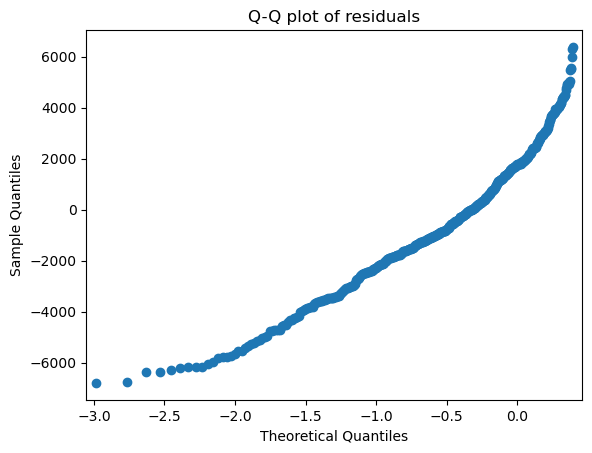

In [149]:
sm.qqplot(residuals)
plt.title("Q-Q plot of residuals")
plt.show()